# Importing Libraries

In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression

# Data Preprocessing and Cleaning

In [116]:
d= pd.read_csv ('D://NCI//DMML//liver.csv', engine= 'python')
d.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [117]:
d.shape

(30691, 11)

<AxesSubplot:>

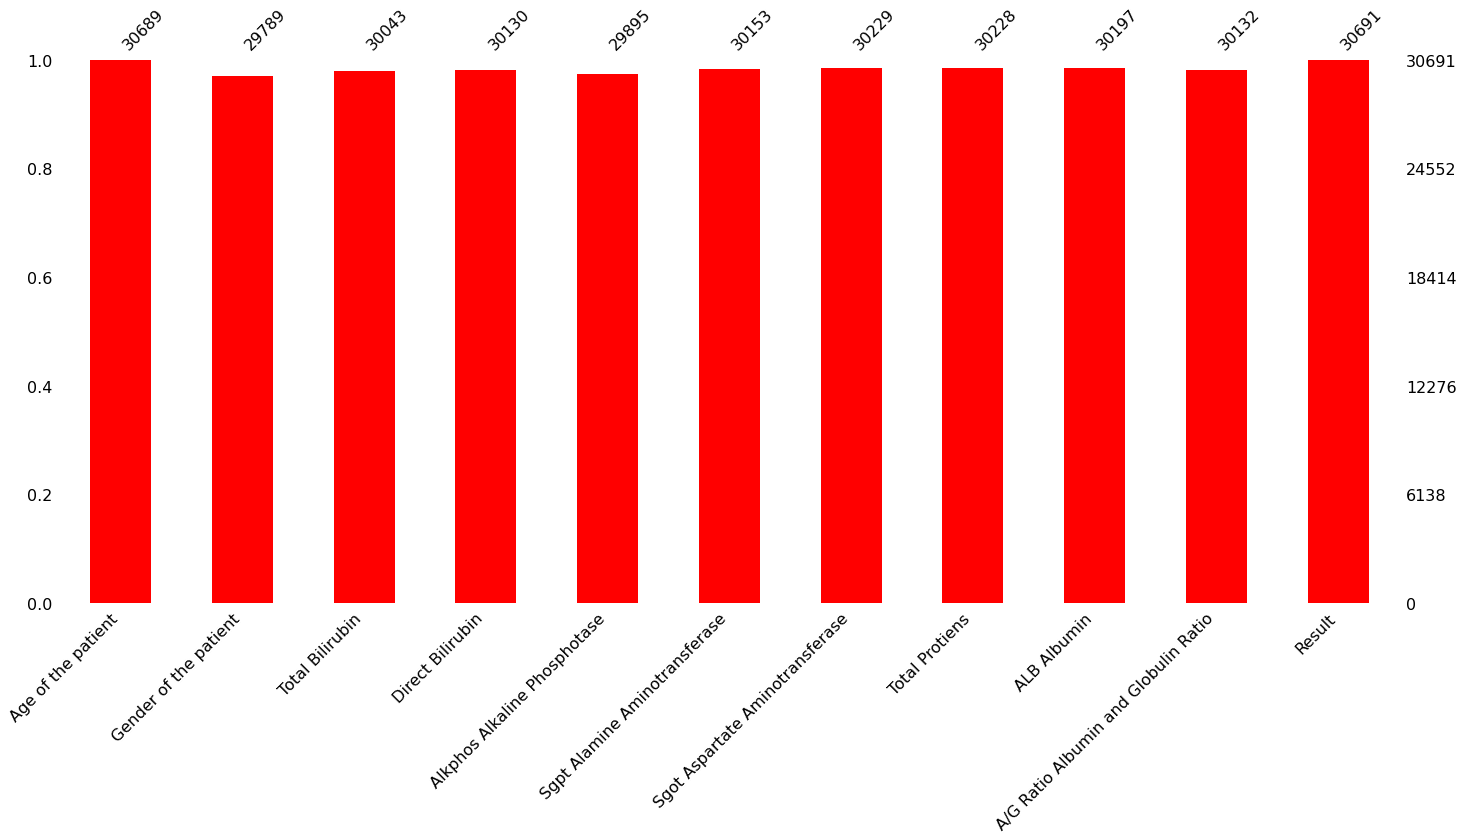

In [118]:
msno.bar (d, color= 'red')

# Creating the Correlation and Heatmap

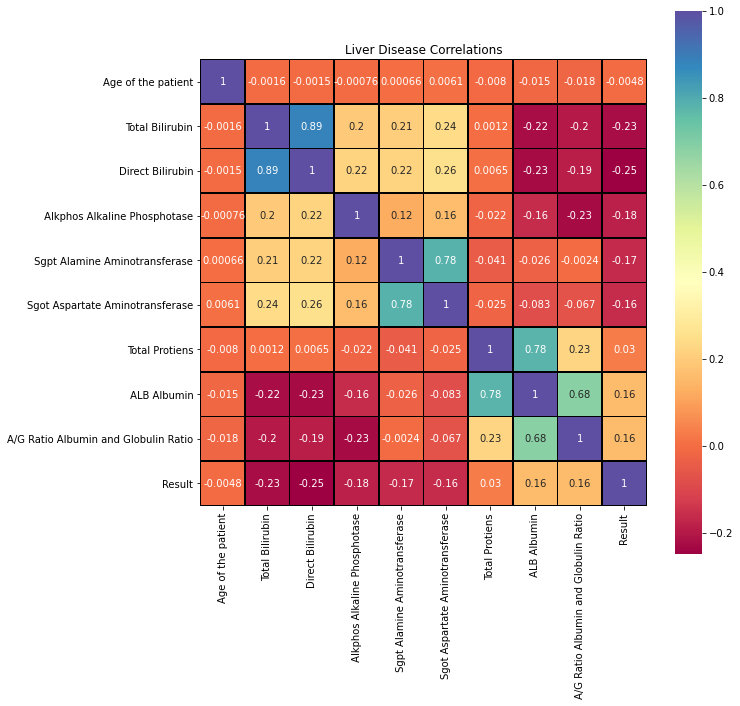

In [119]:
plt.subplots(figsize=(10,10))
sns.heatmap(d.corr(),linewidths=0.5,linecolor='black',vmax=1.0,square=True,cmap="Spectral",annot=True)
plt.title('Liver Disease Correlations')
plt.show()

In [120]:
d= d.drop_duplicates()
d.shape

(19368, 11)

In [121]:
d=d.dropna( how= 'any')
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16389 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16389 non-null  float64
 1   Gender of the patient                 16389 non-null  object 
 2   Total Bilirubin                       16389 non-null  float64
 3   Direct Bilirubin                      16389 non-null  float64
 4    Alkphos Alkaline Phosphotase         16389 non-null  float64
 5    Sgpt Alamine Aminotransferase        16389 non-null  float64
 6   Sgot Aspartate Aminotransferase       16389 non-null  float64
 7   Total Protiens                        16389 non-null  float64
 8    ALB Albumin                          16389 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16389 non-null  float64
 10  Result                                16389 non-null  int64  
dtypes: float64(9), 

In [122]:
d.isna().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [123]:
df_1 = d.drop(['Gender of the patient'],axis=1)
df_1.head()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


array([[<AxesSubplot:title={'center':'Age of the patient'}>,
        <AxesSubplot:title={'center':'Total Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct Bilirubin'}>],
       [<AxesSubplot:title={'center':'\xa0Alkphos Alkaline Phosphotase'}>,
        <AxesSubplot:title={'center':'\xa0Sgpt Alamine Aminotransferase'}>,
        <AxesSubplot:title={'center':'Sgot Aspartate Aminotransferase'}>],
       [<AxesSubplot:title={'center':'Total Protiens'}>,
        <AxesSubplot:title={'center':'\xa0ALB Albumin'}>,
        <AxesSubplot:title={'center':'A/G Ratio Albumin and Globulin Ratio'}>],
       [<AxesSubplot:title={'center':'Result'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

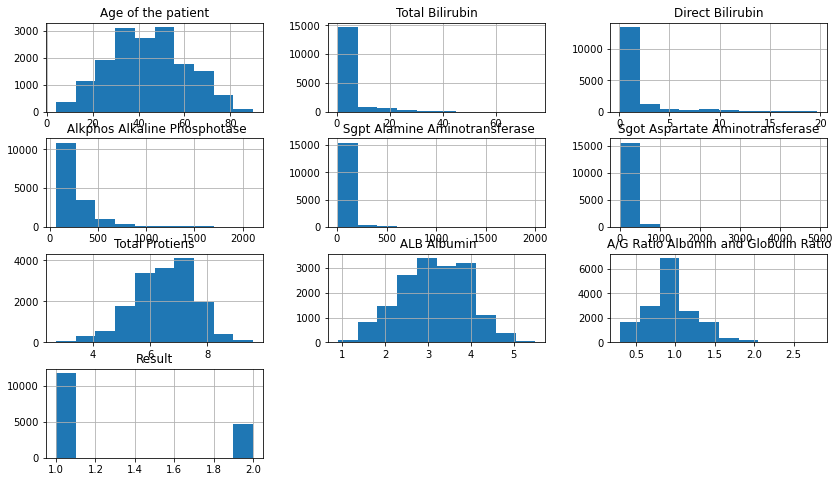

In [124]:
df_1.hist(figsize=(14,8))

array([[<AxesSubplot:title={'center':'Age of the patient'}>,
        <AxesSubplot:title={'center':'Total Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct Bilirubin'}>],
       [<AxesSubplot:title={'center':'\xa0Alkphos Alkaline Phosphotase'}>,
        <AxesSubplot:title={'center':'\xa0Sgpt Alamine Aminotransferase'}>,
        <AxesSubplot:title={'center':'Sgot Aspartate Aminotransferase'}>],
       [<AxesSubplot:title={'center':'Total Protiens'}>,
        <AxesSubplot:title={'center':'\xa0ALB Albumin'}>,
        <AxesSubplot:title={'center':'A/G Ratio Albumin and Globulin Ratio'}>],
       [<AxesSubplot:title={'center':'Result'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

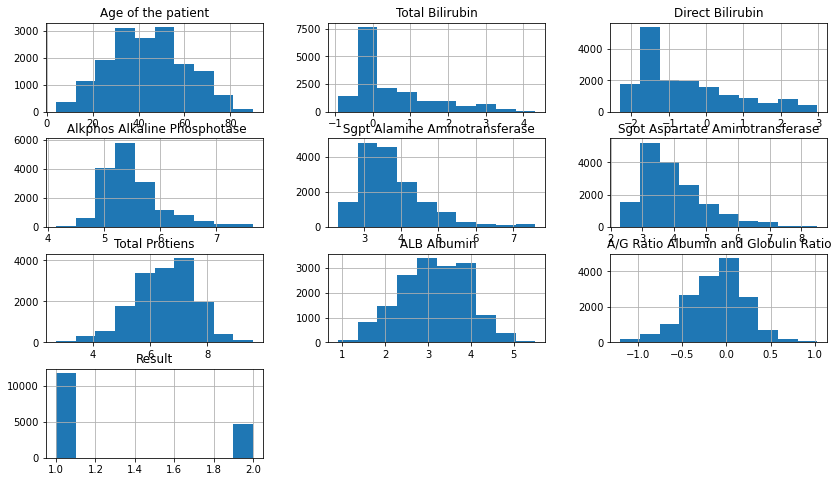

In [125]:
skewed = ['Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'A/G Ratio Albumin and Globulin Ratio']

liver_data_features_log_transformed = pd.DataFrame(data = df_1)
liver_data_features_log_transformed[skewed] = df_1[skewed].apply(lambda x: np.log(x))

liver_data_features_log_transformed.hist(figsize=(14,8))

In [126]:
X = df_1.drop(['Result'],axis=1)
Y = d['Result']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)
sc = StandardScaler()

# Splitting the Dataset into Train and Test

In [127]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM Classifier Evaluation Method

In [128]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
svm_model.fit(X_train,Y_train)
Y_predict = svm_model.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict)
print("Confusion Matrix is :", cm)

Confusion Matrix is : [[3553    0]
 [1364    0]]


In [129]:
score = svm_model.score(X_test, Y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(Y_test, Y_predict, digits=3))

Score of the model is -  0.7225950782997763
Report card of this model - 
              precision    recall  f1-score   support

           1      0.723     1.000     0.839      3553
           2      0.000     0.000     0.000      1364

    accuracy                          0.723      4917
   macro avg      0.361     0.500     0.419      4917
weighted avg      0.522     0.723     0.606      4917



C:\Users\Jinal Sarvaiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jinal Sarvaiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jinal Sarvaiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Score: 0.7225950782997763')

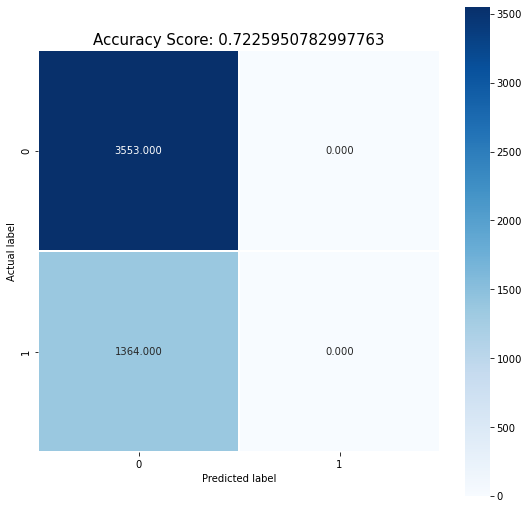

In [130]:
cm1 = metrics.confusion_matrix(Y_test, Y_predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

# Logisitc Regression Evaluation Method

In [131]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

In [132]:
score = lr.score(X_test, Y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(Y_test, y_pred, digits=3))
print("Accuracy score - ", metrics.accuracy_score(Y_test,y_pred))

Score of the model is -  0.7350010168802115
Report card of this model - 
              precision    recall  f1-score   support

           1      0.771     0.900     0.831      3553
           2      0.539     0.306     0.390      1364

    accuracy                          0.735      4917
   macro avg      0.655     0.603     0.610      4917
weighted avg      0.707     0.735     0.709      4917

Accuracy score -  0.7350010168802115


Text(0.5, 1.0, 'Accuracy Score: 0.7350010168802115')

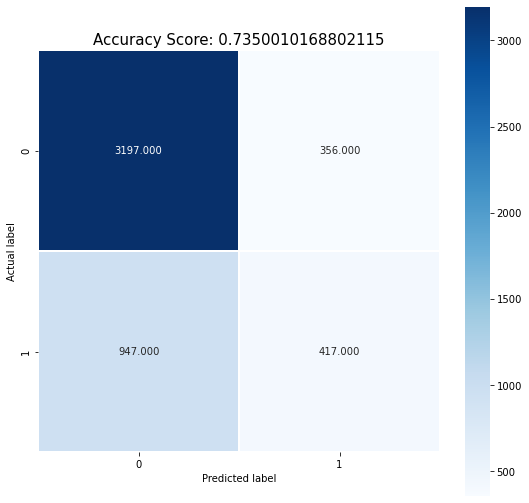

In [134]:
cm1 = metrics.confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

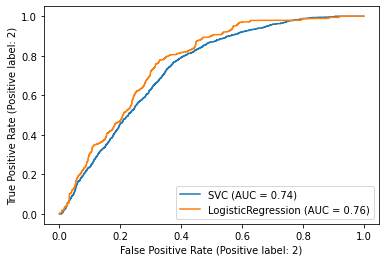

In [135]:
dis= plot_roc_curve (svm_model, X_test, Y_test)
plot_roc_curve (lr, X_test, Y_test, ax= dis.ax_)
